<a href="https://colab.research.google.com/github/mehalg/PCAonMNIST/blob/main/PCAonMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv("/content/mnist_train.csv")

In [ ]:
df.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(59999, 785)

In [ ]:
l=df['5']
d=df.drop("5", axis=1)

In [ ]:
d.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(d.shape)
print(l.shape)

(59999, 784)
(59999,)


#**PCA Using Scikit-Learn**

Using a sample data od 1000 datapooints out of the total 1724 datapoints for time-efficiency.

In [ ]:
labels=l.head(1000)
data = d.head(1000)
print("The shape of sample data is: ", data.shape)

The shape of sample data is:  (1000, 784)


**DATA PREPROCESSING:**

**Standardizing the data**

We scale our data by subtracting the mean then dividing by the std dev so that each feature has a single unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
standardized_data.shape

(1000, 784)

In [ ]:
sample_data= standardized_data

**Initializing PCA**

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()

Configuring the parameters and setting the number of components to 2.

In [ ]:
pca.n_components = 2
pca_data= pca.fit_transform(sample_data)

The reduced pca will contain the 2D components of the sample data that was selected.

Let's see the shape of the reduced pca, it should contain 2 columns.

In [ ]:
print("Shape of the reduced pca = ", pca_data.shape)

Shape of the reduced pca =  (1000, 2)


Attaching the label for each 2D data point and creating a new dataframe which will help us in plotting the data.

In [ ]:
pca_data= np.vstack((pca_data.T, labels)).T
pca_data.shape

(1000, 3)

In [ ]:
pca_data

array([[ 8.20054578,  7.12316694,  0.        ],
       [ 3.10609604, -7.91390226,  4.        ],
       [-7.8487296 ,  0.57279394,  1.        ],
       ...,
       [ 2.73419397, -0.96574246,  3.        ],
       [-3.72774272,  5.43200448,  6.        ],
       [ 2.93344684,  0.86205261,  0.        ]])

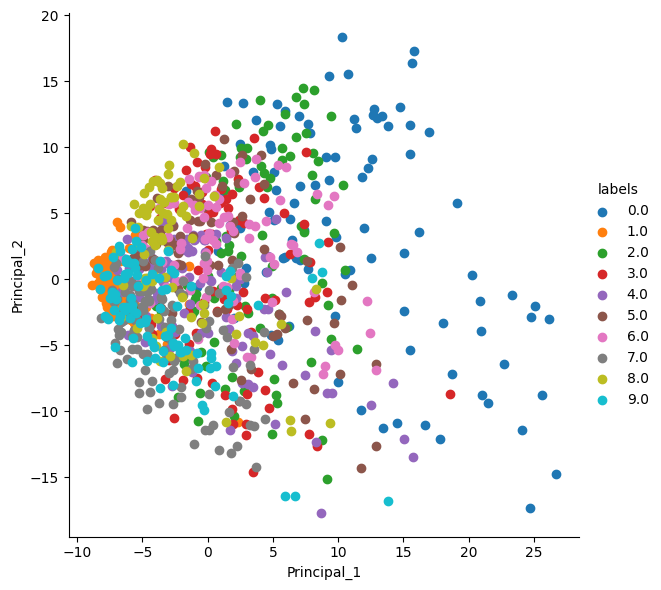

In [ ]:
pca_df = pd.DataFrame(data=pca_data, columns=("Principal_1", "Principal_2", "labels"))
sns.FacetGrid(pca_df, hue="labels", height=6).map(plt.scatter, "Principal_1", "Principal_2" ).add_legend()
plt.show()